# Question 1

In [1]:
# Necessary imports
import numpy as np
import matplotlib.pyplot as plt
import h5py # to be able to use v 7.3 .mat files in the Python 
from sklearn.decomposition import PCA 
from sklearn.decomposition import FastICA
from sklearn.decomposition import NMF

/Users/user/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
with h5py.File('hw4_data1.mat', 'r') as file:
    data_keys = list(file.keys())

data = dict()
with h5py.File('hw4_data1.mat', 'r') as file:
    for key in data_keys:
        data[key] = np.array(file[key])
        print('Shape of the data associated with %s:' % key,
              np.shape(data[key]), '\n')

Shape of the data associated with faces: (1024, 1000) 



In [3]:
# QUESTION 1
print('QUESTION 1')

QUESTION 1


In [4]:
faces = data['faces'].T

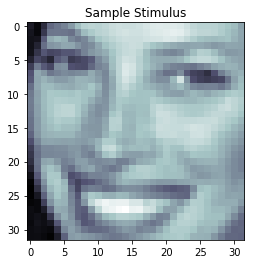

In [5]:
# A sample stimuli
figure_num = 1
plt.figure(figure_num)
figure_num += 1
plt.imshow(faces[7].reshape(32, 32).T, cmap=plt.cm.bone)
plt.title('Sample Stimulus')
plt.show(block=False)

In [6]:
# PART A
print('PART A')

PART A


In [7]:
pca = PCA(100, whiten=True) 
pca.fit(faces) 

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

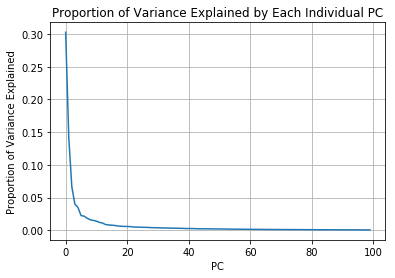

In [8]:
plt.figure(figure_num)
figure_num += 1
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('PC')
plt.ylabel('Proportion of Variance Explained')
plt.title('Proportion of Variance Explained by Each Individual PC')
plt.grid()
plt.show(block=False)

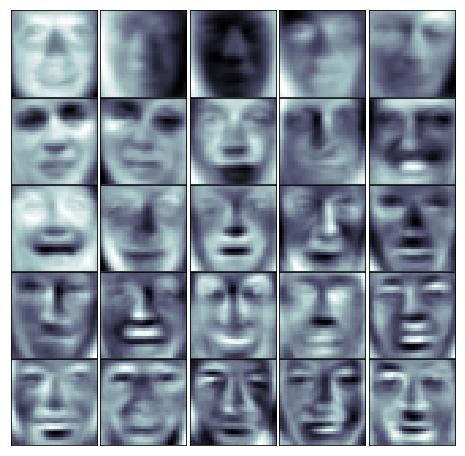

In [9]:
fig, axes = plt.subplots(5, 5, figsize=(8,8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
     ax.imshow(pca.components_[i].reshape(32, 32).T, cmap=plt.cm.bone)
#plt.savefig('q1f3.png', bbox_inches='tight')

In [10]:
# PART B
print('PART B')

PART B


In [11]:
# Obtain the reconstructions
faces_PCA_10 = (faces - pca.mean_).dot(pca.components_[0:10].T).dot(pca.components_[0:10]) + pca.mean_
faces_PCA_25 = (faces - pca.mean_).dot(pca.components_[0:25].T).dot(pca.components_[0:25]) + pca.mean_
faces_PCA_50 = (faces - pca.mean_).dot(pca.components_[0:50].T).dot(pca.components_[0:50]) + pca.mean_

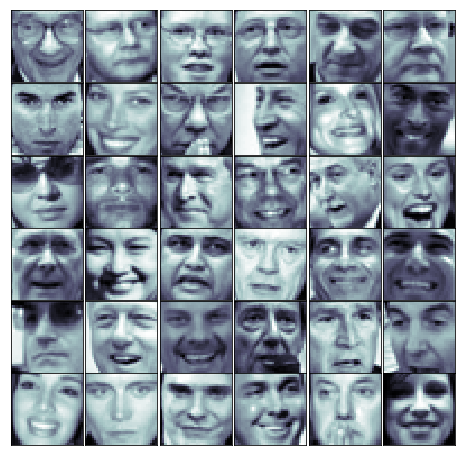

In [12]:
fig, axes = plt.subplots(6, 6, figsize=(8,8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
     ax.imshow(faces[i].reshape(32, 32).T, cmap=plt.cm.bone)
#plt.savefig('q1f4.png', bbox_inches='tight')

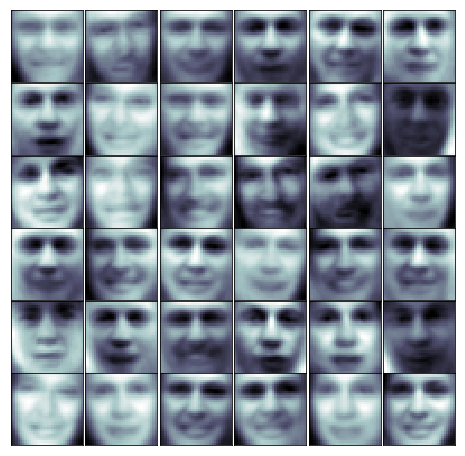

In [13]:
fig, axes = plt.subplots(6, 6, figsize=(8,8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
     ax.imshow(faces_PCA_10[i].reshape(32, 32).T, cmap=plt.cm.bone)
#plt.savefig('q1f5.png', bbox_inches='tight')

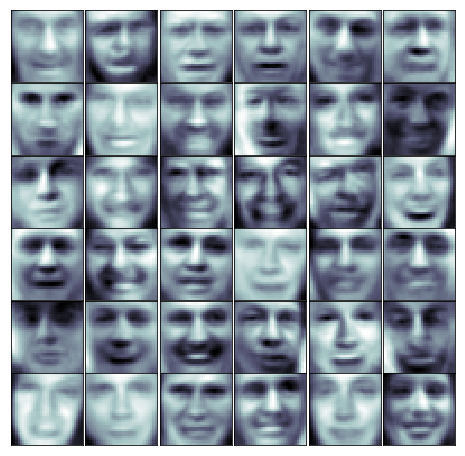

In [14]:
fig, axes = plt.subplots(6, 6, figsize=(8,8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
     ax.imshow(faces_PCA_25[i].reshape(32, 32).T, cmap=plt.cm.bone)
#plt.savefig('q1f6.png', bbox_inches='tight')

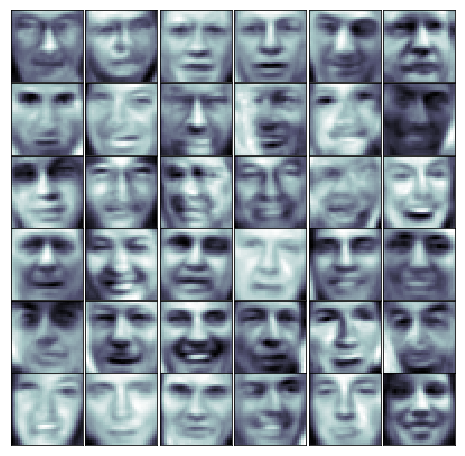

In [15]:
fig, axes = plt.subplots(6, 6, figsize=(8,8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
     ax.imshow(faces_PCA_50[i].reshape(32, 32).T, cmap=plt.cm.bone)
#plt.savefig('q1f7.png', bbox_inches='tight')

In [16]:
# Compute the mean and standard deviation of the reconstruction losses
losses_PCA_10 = (faces - faces_PCA_10) ** 2
MSE_PCA_10, std_PCA_10 = np.mean(losses_PCA_10), np.std(np.mean(losses_PCA_10, axis=1))
losses_PCA_25 = (faces - faces_PCA_25) ** 2
MSE_PCA_25, std_PCA_25 = np.mean(losses_PCA_25), np.std(np.mean(losses_PCA_25, axis=1))
losses_PCA_50 = (faces - faces_PCA_50) ** 2
MSE_PCA_50, std_PCA_50 = np.mean(losses_PCA_50), np.std(np.mean(losses_PCA_50, axis=1))

In [17]:
print('Reconstruction loss (10 PCs): mean of MSEs = %f , std of MSEs = % f' % (MSE_PCA_10, std_PCA_10))
print('Reconstruction loss (25 PCs): mean of MSEs = %f , std of MSEs = % f' % (MSE_PCA_25, std_PCA_25))
print('Reconstruction loss (50 PCs): mean of MSEs = %f , std of MSEs = % f' % (MSE_PCA_50, std_PCA_50))

Reconstruction loss (10 PCs): mean of MSEs = 523.241745 , std of MSEs =  257.641201
Reconstruction loss (25 PCs): mean of MSEs = 332.256492 , std of MSEs =  153.110209
Reconstruction loss (50 PCs): mean of MSEs = 198.425243 , std of MSEs =  84.180931


In [18]:
# PART C
print('PART C')

PART C


In [19]:
ica_10 = FastICA(10, whiten=True, random_state=np.random.seed(7)) 
ica_25 = FastICA(25, whiten=True, random_state=np.random.seed(7)) 
ica_50 = FastICA(50, whiten=True, random_state=np.random.seed(7)) 
ica_10.fit(faces) 
ica_25.fit(faces) 
ica_50.fit(faces) 

FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
    n_components=50, random_state=None, tol=0.0001, w_init=None,
    whiten=True)

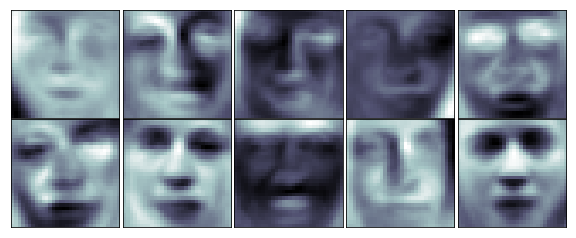

In [20]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
     ax.imshow(ica_10.components_[i].reshape(32, 32).T, cmap=plt.cm.bone)
#plt.savefig('q1f8.png', bbox_inches='tight')

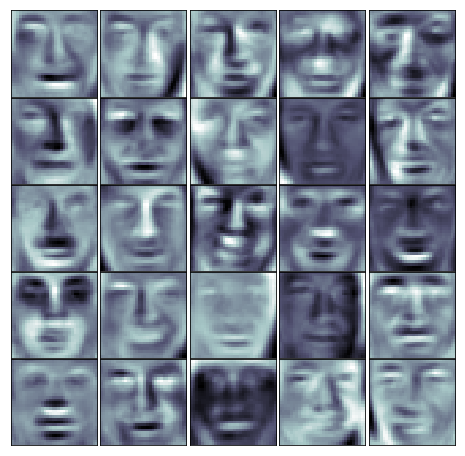

In [21]:
fig, axes = plt.subplots(5, 5, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
     ax.imshow(ica_25.components_[i].reshape(32, 32).T, cmap=plt.cm.bone)
#plt.savefig('q1f9.png', bbox_inches='tight')

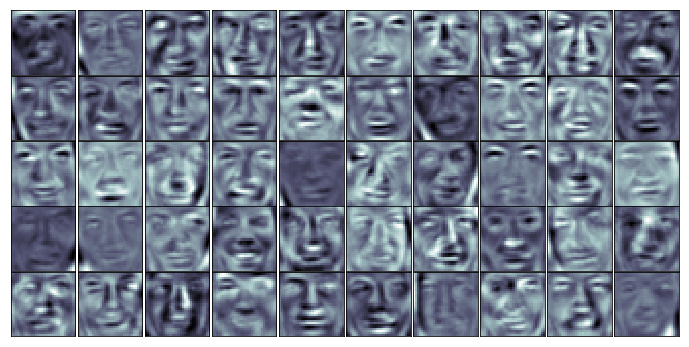

In [22]:
fig, axes = plt.subplots(5, 10, figsize=(12, 6),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
     ax.imshow(ica_50.components_[i].reshape(32, 32).T, cmap=plt.cm.bone)
#plt.savefig('q1f10.png', bbox_inches='tight')

In [23]:
# Obtain the reconstructions
S_10 = ica_10.fit_transform(faces) 
A_10 = ica_10.mixing_  
faces_ICA_10 = S_10.dot(A_10.T) + ica_10.mean_
S_25 = ica_25.fit_transform(faces) 
A_25 = ica_25.mixing_  
faces_ICA_25 = S_25.dot(A_25.T) + ica_25.mean_
S_50 = ica_50.fit_transform(faces) 
A_50 = ica_50.mixing_  
faces_ICA_50 = S_50.dot(A_50.T) + ica_50.mean_

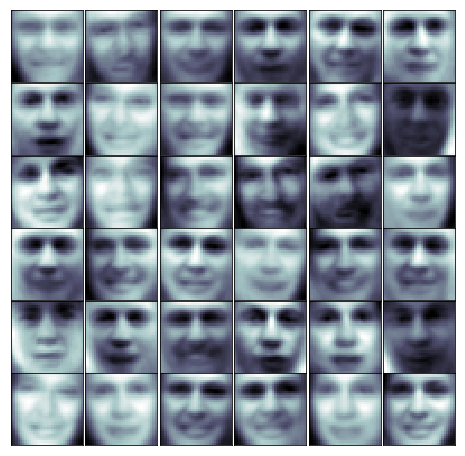

In [24]:
fig, axes = plt.subplots(6, 6, figsize=(8,8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
     ax.imshow(faces_ICA_10[i].reshape(32, 32).T, cmap=plt.cm.bone)
#plt.savefig('q1f11.png', bbox_inches='tight')

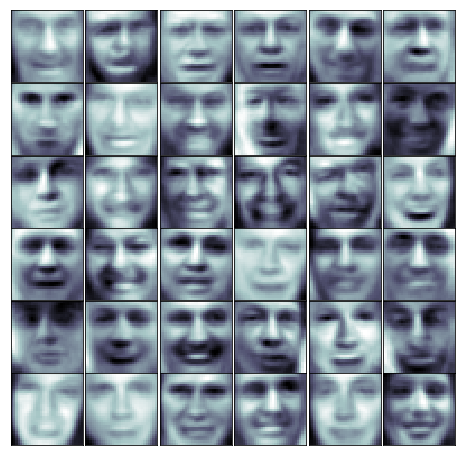

In [25]:
fig, axes = plt.subplots(6, 6, figsize=(8,8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
     ax.imshow(faces_ICA_25[i].reshape(32, 32).T, cmap=plt.cm.bone)
#plt.savefig('q1f12.png', bbox_inches='tight')

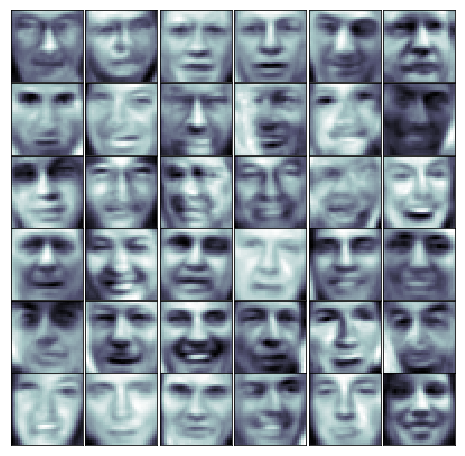

In [26]:
fig, axes = plt.subplots(6, 6, figsize=(8,8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
     ax.imshow(faces_ICA_50[i].reshape(32, 32).T, cmap=plt.cm.bone)
#plt.savefig('q1f13.png', bbox_inches='tight')

In [27]:
# Compute the mean and standard deviation of the reconstruction losses
losses_ICA_10 = (faces - faces_ICA_10) ** 2
MSE_ICA_10, std_ICA_10 = np.mean(losses_ICA_10), np.std(np.mean(losses_ICA_10, axis=1))
losses_ICA_25 = (faces - faces_ICA_25) ** 2
MSE_ICA_25, std_ICA_25 = np.mean(losses_ICA_25), np.std(np.mean(losses_ICA_25, axis=1))
losses_ICA_50 = (faces - faces_ICA_50) ** 2
MSE_ICA_50, std_ICA_50 = np.mean(losses_ICA_50), np.std(np.mean(losses_ICA_50, axis=1))

In [28]:
print('Reconstruction loss (10 ICs): mean of MSEs = %f , std of MSEs = % f' % (MSE_ICA_10, std_ICA_10))
print('Reconstruction loss (25 ICs): mean of MSEs = %f , std of MSEs = % f' % (MSE_ICA_25, std_ICA_25))
print('Reconstruction loss (50 ICs): mean of MSEs = %f , std of MSEs = % f' % (MSE_ICA_50, std_ICA_50))

Reconstruction loss (10 ICs): mean of MSEs = 523.241745 , std of MSEs =  257.641200
Reconstruction loss (25 ICs): mean of MSEs = 332.256492 , std of MSEs =  153.110288
Reconstruction loss (50 ICs): mean of MSEs = 198.425067 , std of MSEs =  84.179966


In [29]:
# PART D
print('PART D')

PART D


In [30]:
nmf_faces = faces + np.abs(np.min(faces))
nmf_10 = NMF(n_components=10, solver="mu", max_iter=500)
W_10 = nmf_10.fit_transform(nmf_faces) 
H_10 = nmf_10.components_
nmf_25 = NMF(n_components=25, solver="mu", max_iter=500)
W_25 = nmf_25.fit_transform(nmf_faces) 
H_25 = nmf_25.components_
nmf_50 = NMF(n_components=50, solver="mu", max_iter=500)
W_50 = nmf_50.fit_transform(nmf_faces) 
H_50 = nmf_50.components_

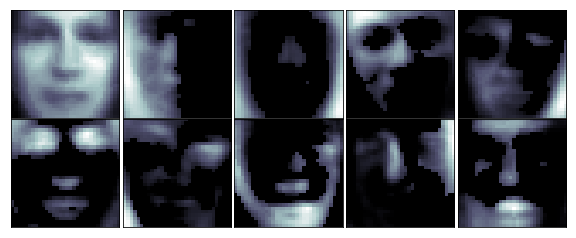

In [31]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
     ax.imshow(nmf_10.components_[i].reshape(32, 32).T, cmap=plt.cm.bone)
#plt.savefig('q1f14.png', bbox_inches='tight')

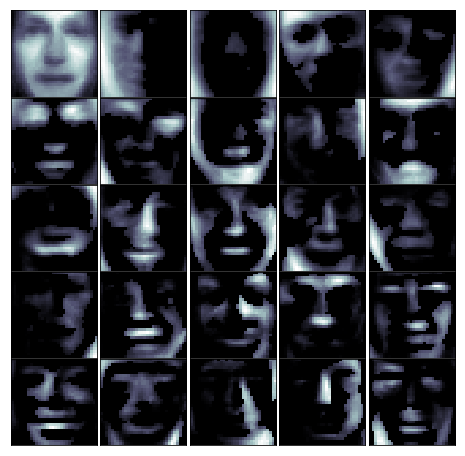

In [32]:
fig, axes = plt.subplots(5, 5, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
     ax.imshow(nmf_25.components_[i].reshape(32, 32).T, cmap=plt.cm.bone)
#plt.savefig('q1f15.png', bbox_inches='tight')

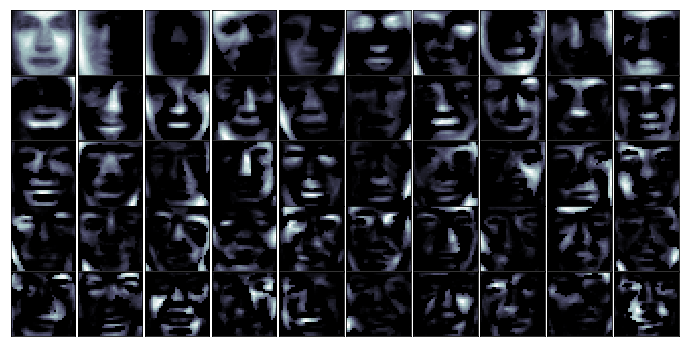

In [33]:
fig, axes = plt.subplots(5, 10, figsize=(12, 6),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
     ax.imshow(nmf_50.components_[i].reshape(32, 32).T, cmap=plt.cm.bone)
#plt.savefig('q1f16.png', bbox_inches='tight')

In [34]:
# Obtain the reconstructions
faces_NMF_10 = W_10.dot(H_10) - np.abs(np.min(faces))
faces_NMF_25 = W_25.dot(H_25) - np.abs(np.min(faces))
faces_NMF_50 = W_50.dot(H_50) - np.abs(np.min(faces))

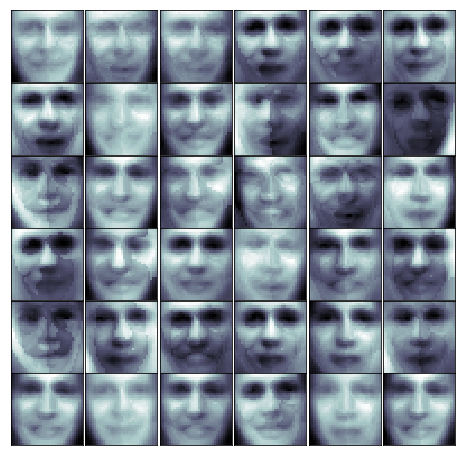

In [35]:
fig, axes = plt.subplots(6, 6, figsize=(8,8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
     ax.imshow(faces_NMF_10[i].reshape(32, 32).T, cmap=plt.cm.bone)
#plt.savefig('q1f17.png', bbox_inches='tight')

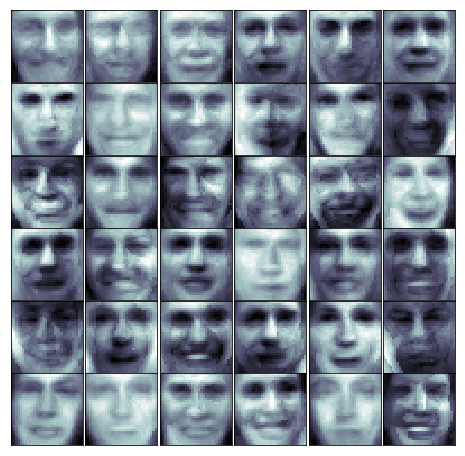

In [36]:
fig, axes = plt.subplots(6, 6, figsize=(8,8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
     ax.imshow(faces_NMF_25[i].reshape(32, 32).T, cmap=plt.cm.bone)
#plt.savefig('q1f18.png', bbox_inches='tight')

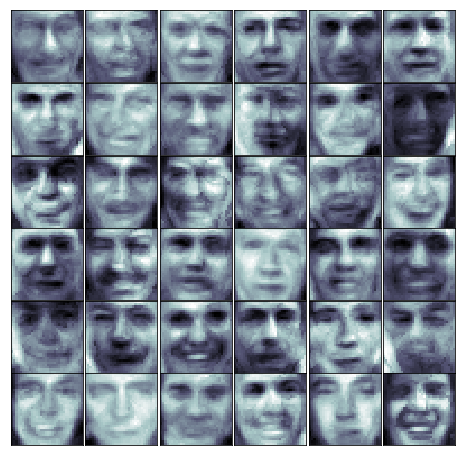

In [37]:
fig, axes = plt.subplots(6, 6, figsize=(8,8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
     ax.imshow(faces_NMF_50[i].reshape(32, 32).T, cmap=plt.cm.bone)
#plt.savefig('q1f19.png', bbox_inches='tight')

In [38]:
# Compute the mean and standard deviation of the reconstruction losses
losses_NMF_10 = (faces - faces_NMF_10) ** 2
MSE_NMF_10, std_NMF_10 = np.mean(losses_NMF_10), np.std(np.mean(losses_NMF_10, axis=1))
losses_NMF_25 = (faces - faces_NMF_25) ** 2
MSE_NMF_25, std_NMF_25 = np.mean(losses_NMF_25), np.std(np.mean(losses_NMF_25, axis=1))
losses_NMF_50 = (faces - faces_NMF_50) ** 2
MSE_NMF_50, std_NMF_50 = np.mean(losses_NMF_50), np.std(np.mean(losses_NMF_50, axis=1))

In [39]:
print('Reconstruction loss (10 MFs): mean of MSEs = %f , std of MSEs = % f' % (MSE_NMF_10, std_NMF_10))
print('Reconstruction loss (25 MFs): mean of MSEs = %f , std of MSEs = % f' % (MSE_NMF_25, std_NMF_25))
print('Reconstruction loss (50 MFs): mean of MSEs = %f , std of MSEs = % f' % (MSE_NMF_50, std_NMF_50))

Reconstruction loss (10 MFs): mean of MSEs = 711.188931 , std of MSEs =  373.312780
Reconstruction loss (25 MFs): mean of MSEs = 547.534706 , std of MSEs =  275.813284
Reconstruction loss (50 MFs): mean of MSEs = 417.404509 , std of MSEs =  203.446847


In [40]:
plt.show()